In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imagetools as im

%matplotlib notebook



# Part 1 - Bob's Watermarking Technique

## Question 1

In [28]:
#load the images and the mask
xalice = plt.imread('assets/img_alice.png')
ybob = plt.imread('assets/img_bob.png')

mask = np.load('assets/mask.npy')

In [31]:
shape_x = xalice.shape
shape_y = ybob.shape
shape_m = mask.shape
print("shape of xalice, ybob, mask respectively",shape_x,shape_y, shape_m)

max_x, min_x = np.max(xalice),np.min(xalice)
max_y,min_y = np.max(ybob),np.min(ybob)
max_m, min_m = np.max(mask),np.min(mask)
print("range of xalice, ybob and mask respectively (%d, %d), (%f, %d), (%d, %d)" % (min_x, max_x, min_y, max_y,min_m, max_m))

shape of xalice, ybob, mask respectively (540, 720, 3) (540, 720, 3) (540, 720, 3)
range of xalice, ybob and mask respectively (0, 1), (0.007843, 1), (0, 1)


Shape of xalice, ybob, mask respectively (540, 720, 3) (540, 720, 3) (540, 720, 3)

Range of xalice, ybob and mask respectively (0, 1), (0.007843, 1), (0, 1)

## Question 2



/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


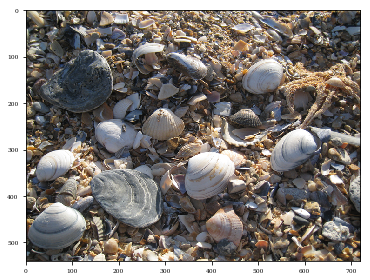

In [34]:
plt.figure()
plt.imshow(xalice)

There are no buttons after my picture

## Question 3

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


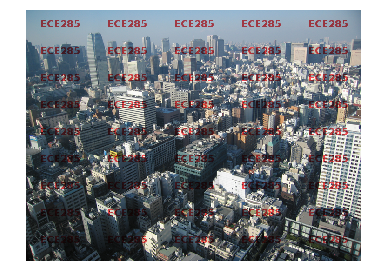

In [32]:
plt.figure()
im.show(ybob)


The difference is that the in-house im.show does not show the axes

## Question 4

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


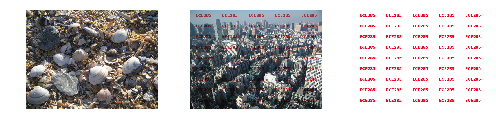

In [36]:

9+

9+


The first line defines the figure and its axis with 3 different subpolots each with a defined size, the next three lines
define what array contents are displayed where (axis locations). The final command displays the result

## Question 5 and 6

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


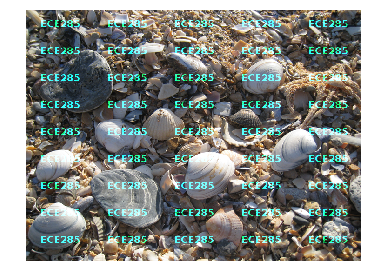

In [41]:
def watermark(x, mask, p):
    lambd = 1/((1-p)*mask + p)
    y = lambd*x
    return y

y_test = watermark(xalice,mask, 0.1)
plt.figure()
im.show(y_test)

## Question 7

Changing p leads to variations in the colour and intensity of the overlaid watermark.

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


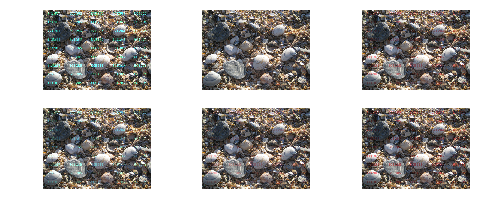

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 3),
                         sharex='all', sharey='all')
for k in range(6):
    im.show(watermark(xalice, mask, p=(k+1)/3), ax=axes[k % 2][int(k / 2)])
fig.show()

# Part 2 - Alice's Watermarking Removal
## Question 8

In [63]:
def iwatermark(y, m, p):
    x = ((1-p)*m +p)*y
    return x

## Question 9

In [77]:
def energy(y, m, p):
    e = np.zeros_like(p)
    for i in range(len(p)):
        x = iwatermark(y,m,p[i])
        m_bar = np.mean(m)
        mu_bar = np.mean(x)
        #print(((m-m_bar)*(x-mu_bar)).shape)
        e_root = np.mean((m-m_bar)*(x-mu_bar))
        e[i] = e_root*e_root
    return e

## Question 10

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


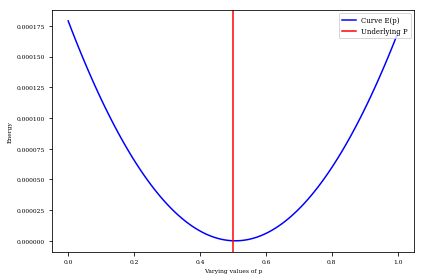

In [97]:
yalice = watermark(xalice, mask, p =0.5)
p =0.5
p_test =np.linspace(0, 2 * p, 100) 
E_p = energy(yalice, mask,p_test)
p_e = plt.plot(p_test, E_p,'b-',label='Curve E(p)')
p_p = plt.axvline(x=p, label='Underlying P', c='r')
plt.xlabel('Varying values of p')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.show()

## Question 11


$\Sigma_k(m_k-\bar{m})(\hat{x_k} - \bar{\mu})$

Since,

$\bar{\mu} = \frac{1}{n}\Sigma_k [m_k - \hat{p}(1-m_k)]y_k$

We can write:

$\Sigma_{k'}\bar{m_{k'}}\bar{\mu}= \Sigma_{k'} \frac{m_{k'}}{n}\Sigma_k [m_k - \hat{p}(1-m_k)]y_k $

And we note that

$\Sigma_{k'} \frac{m_{k'}}{n} = \bar{m}$

$\Sigma_{k'}\bar{m}\bar{\mu} = \Sigma_{k'} \frac{m}{n}\Sigma_k [m_k - \hat{p}(1-m_k)]y_k $

Similarly the first term equals $\bar{m}$

And we can write that:
$\Sigma_k(m_k-\bar{m})(\hat{x_k} - \bar{\mu}) = \Sigma_k(m_k-\bar{m})\hat{x_k}$

Then we proved the $E(p)$ part:

$E(p) = \frac{1}{n}\Sigma_k m_k(m_k-\bar{m})y_k +\hat{p}(1-m_k)(m_k -\bar{m})y_k$

taking the derivative wrt p and set to zero:

$\frac{\delta E(p)}{\delta p} = 0 = [2\frac{1}{n}\Sigma_k m_k(m_k-\bar{m})y_k +\hat{p}(1-m_k)(m_k -\bar{m})y_k]. \frac{1}{n}\Sigma_k (1-m_k)(m_k - \bar{m})$

This implies that the minimum is found when:

$p = - \frac{\Sigma_k m_k(m_k-\bar{m})y_k}{\Sigma_k(1-m_k)(m_k -\bar{m})y_k}$


## Question 12

In [100]:
def estimate_p(y, m):
    m_bar = np.mean(m)
    num = np.mean(m*(m-m_bar)*y)
    den = np.mean((1-m)*(m-m_bar)*y)
    p = -num/den
    return p

In [102]:
p_hat = estimate_p(yalice,mask)


/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


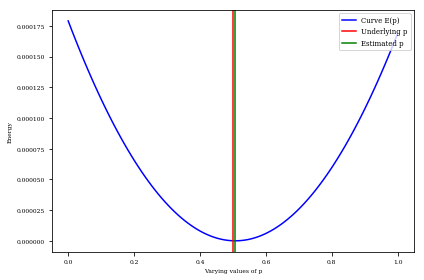

In [106]:
yalice = watermark(xalice, mask, p =0.5)
p =0.5
p_test =np.linspace(0, 2 * p, 100) 
E_p = energy(yalice, mask,p_test)
p_e = plt.plot(p_test, E_p,'b-',label='Curve E(p)')
p_p = plt.axvline(x=p, label='Underlying p', c='r')
p_phat = plt.axvline(x=p_hat, label='Estimated p', c='g')
plt.xlabel('Varying values of p')
plt.ylabel('Energy')
plt.legend(loc='upper right')
plt.show()

## Question 13

3.141587142445284


/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


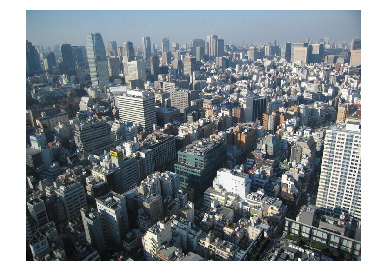

In [110]:
p_bob = estimate_p(ybob,mask)
print(p_bob)
xbob = iwatermark(ybob, mask, p_bob)
plt.figure()
im.show(xbob)

Bob has been using a value of 3.1415
## Question 14

/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nasha/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


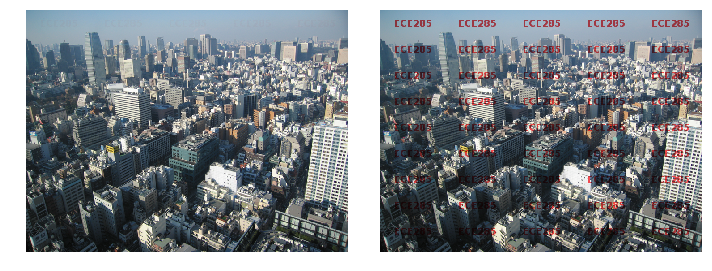

In [112]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
im.show(xbob, ax=axes[0])
im.show(ybob, ax=axes[1])

fig.show()

## Question 15

Bob was right that Alice could not get the exact image back but Alice could get an estimate close enough for the two to be indistinguishable.